In [1]:
import imp,SpiralMap, dtools
imp.reload(SpiralMap)
import SpiralMap as sp
import matplotlib.pyplot as plt
import os
import putil

/var/folders/b4/y48vfmk16dnf344d6ld26vtm0000gn/T/ipykernel_15578/1642880794.py:1: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp,SpiralMap, dtools


In [2]:
plt.ion()

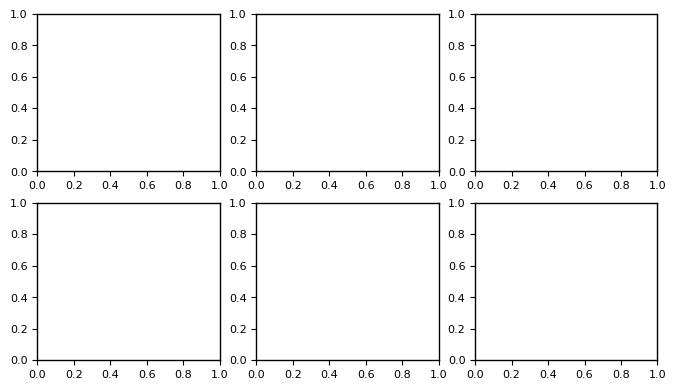

In [3]:
xsun=-8.277
plotattrs = {'plot':True,'coordsys':'GC','markersize':15,'markSunGC':True}
plt.close('all')
plm=putil.Plm2(2,3,xsize=8.0,ysize=4.5,xmulti=False,ymulti=False,full=True,slabelx=0.7,slabely=0.07)			
	